# Classification des chiffres MNIST avec PCA et SVM - Ewan Vidal

Ce notebook applique l'**Analyse en Composantes Principales (PCA)** pour réduire la dimensionnalité avant d'entraîner une **Machine à Vecteurs de Support (SVM)** pour la classification des chiffres. La performance du modèle est ensuite évaluée.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

## 1. Charger le dataset MNIST  
Le **dataset MNIST** contient **70 000 images en niveaux de gris (28x28 pixels)** de chiffres manuscrits (0-9).  

Nous utilisons `fetch_openml()` pour charger les images et leurs étiquettes.

In [3]:
# 1️⃣ Charger le dataset MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data.astype(np.float32), mnist.target.astype(int)

## 2. Normaliser les données  
La normalisation permet de ramener les valeurs des pixels entre **0 et 1** en divisant chaque valeur par `255.0`.  
Cette étape améliore les performances de **PCA et SVM**.

In [4]:
# 2️⃣ Normalisation des données (important pour PCA & SVM)
X /= 255.0

## 3. Réduction de dimension avec PCA  
L'**Analyse en Composantes Principales (PCA)** réduit le nombre de dimensions tout en conservant un maximum d'informations pertinentes.  

Au lieu d'utiliser les **784 caractéristiques**, nous réduisons le dataset à **50 composantes principales**, ce qui accélère l'entraînement tout en conservant l'essentiel de la variance.

In [5]:
# 3️⃣ Réduire la dimension avec PCA
pca = PCA(n_components=50)  # Réduire à 50 dimensions (optimisé pour classification)
X_pca = pca.fit_transform(X)

## 4. Séparer les données en ensembles d'entraînement et de test  
Pour évaluer la performance du modèle, nous divisons le dataset en **80 % pour l'entraînement et 20 % pour le test** à l'aide de `train_test_split()`.

In [6]:
# 4️⃣ Séparer en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

## 5. Entraîner un classificateur SVM  
Nous utilisons un **SVM avec un noyau RBF** (`SVC(kernel='rbf')`), qui est bien adapté aux données complexes et non linéaires.  

Le paramètre `C=10` ajuste la **marge de décision** pour améliorer la précision du modèle.

In [7]:
# 5️⃣ Entraîner un classifieur SVM
svm_model = SVC(kernel='rbf', C=10)  # RBF est souvent plus performant sur MNIST
svm_model.fit(X_train, y_train)

SVC(C=10)

## 6. Faire des prédictions et évaluer la performance  
Nous évaluons le modèle à l'aide de :  
- **Score de précision** (`accuracy_score()`)  
- **Rapport de classification** (`classification_report()`) – comprenant la précision, le rappel et le score F1 pour chaque chiffre.

In [8]:
# 6️⃣ Prédictions et évaluation
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy (SVM après PCA): {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

Test Accuracy (SVM après PCA): 98.54%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.97      0.99      0.98      1380
           3       0.98      0.98      0.98      1433
           4       0.98      0.99      0.98      1295
           5       0.99      0.98      0.99      1273
           6       0.99      0.99      0.99      1396
           7       0.98      0.99      0.99      1503
           8       0.98      0.98      0.98      1357
           9       0.98      0.97      0.98      1420

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



## 7. Visualiser MNIST en 2D avec PCA  
Si PCA est réduit à **deux composantes**, nous pouvons visualiser le dataset MNIST en **2D** pour observer la répartition des chiffres.  

Nous utilisons **Seaborn et Matplotlib** pour créer un **nuage de points** basé sur les deux premières composantes principales.

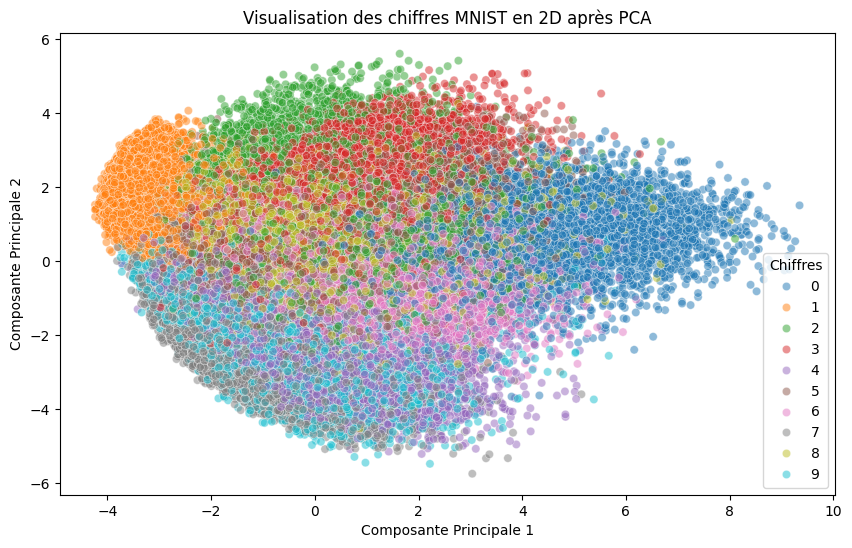

In [9]:
# 7️⃣ Visualisation en 2D si PCA réduit à 2 composants
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette="tab10", alpha=0.5)
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.title("Visualisation des chiffres MNIST en 2D après PCA")
plt.legend(title="Chiffres")
plt.show()
